In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv('https://bit.ly/wine-date')

In [3]:
wine.head()

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine.describe()

alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000     3.320000     1.000000
max      14.900000    65.800000     4.010000     1.000000

In [6]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine[['class']].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [8]:
print(X_train.shape, X_test.shape)

(5197, 3) (1300, 3)


In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, y_train)
print(lr.score(train_scaled, y_train))
print(lr.score(test_scaled, y_test))

0.7808350971714451
0.7776923076923077


c:\Users\minja\anaconda3\envs\ml_cuda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, y_train)
print("Train set accuracy: {:.3f}".format(dt.score(train_scaled, y_train)))
print("Test set accuracy: {:.3f}".format(dt.score(test_scaled, y_test)))

Train set accuracy: 0.997
Test set accuracy: 0.859


[Text(0.5, 0.8333333333333334, 'sugar <= -0.239\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(0.25, 0.5, 'sugar <= -0.802\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'sugar <= 0.204\ngini = 0.069\nsamples = 2275\nvalue = [81, 2194]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

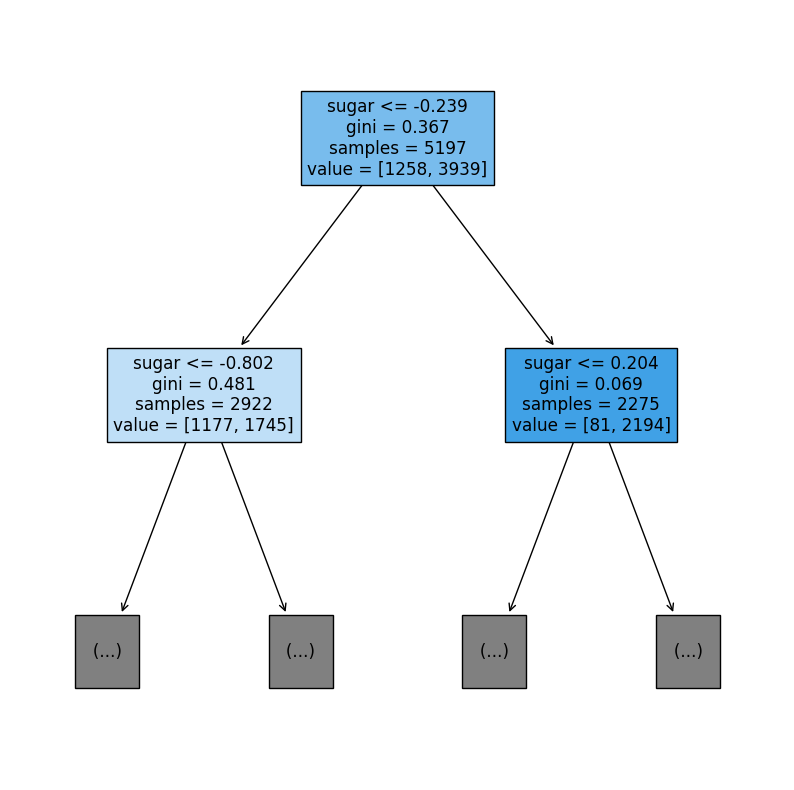

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

In [14]:
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(train_scaled, y_train)
print("Train set accuracy: {:.3f}".format(dt.score(train_scaled, y_train)))
print("Test set accuracy: {:.3f}".format(dt.score(test_scaled, y_test)))

Train set accuracy: 0.845
Test set accuracy: 0.842


In [15]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


In [16]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine[['class']].to_numpy()

In [17]:
X_train_all, X_test, y_train_all, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=42)

In [18]:
print(X_train.shape, X_val.shape)

(4157, 3) (1040, 3)


In [19]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("Train set accuracy: {:.2f}".format(dt.score(X_train, y_train)))
print("Validation set accuracy: {:.2f}".format(dt.score(X_val, y_val)))

Train set accuracy: 1.00
Validation set accuracy: 0.86


In [20]:
from sklearn.model_selection import cross_validate
import numpy as np
scores = cross_validate(dt, X_train, y_train)
print(scores['test_score'])
print("Mean of cross_validated scores :", np.mean(scores['test_score']))

[0.84975962 0.85456731 0.85679904 0.81588448 0.84837545]
Mean of cross_validated scores : 0.8450771776358419


In [21]:
from sklearn.model_selection import StratifiedKFold
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, X_train, y_train, cv=splitter)
print(np.mean(scores['test_score']))

0.8482153614457832


In [22]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [23]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [24]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [25]:
dt = gs.best_estimator_
print(dt.score(X_val, y_val))

0.8682692307692308


In [26]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0004}


In [27]:
from scipy.stats import uniform, randint


In [28]:
rgen = randint(0, 10)
rgen.rvs(10)

array([3, 7, 2, 1, 9, 1, 6, 2, 4, 1], dtype=int64)

In [29]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([104, 104, 102,  96,  86,  90, 120,  98,  96, 104], dtype=int64))

In [30]:
ugen = uniform(0, 1)
print(ugen.rvs(10))

[0.36521762 0.06171899 0.29510691 0.52229119 0.91583126 0.23816012
 0.48295545 0.01190479 0.41284263 0.71269196]


In [31]:
params = {'min_impurity_decrease' : uniform(0.0001, 0.001),
          'max_depth' : randint(20, 50),
          'min_samples_split' : randint(2, 25),
          'min_samples_leaf' : randint(1, 25),
          }

In [32]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D16B62A080>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D16B62A140>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D16B655300>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D16B628E80>},
                   random_state=42)

In [33]:
print(gs.best_params_)

{'max_depth': 34, 'min_impurity_decrease': 0.000556069984217036, 'min_samples_leaf': 15, 'min_samples_split': 20}


In [34]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8674514602425253


In [35]:
dt = gs.best_estimator_
print(dt.score(X_test, y_test))

0.8607692307692307


In [36]:
wine = pd.read_csv('https://bit.ly/wine-date')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [37]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

In [38]:
scores = cross_validate(rf, train_input, train_target, return_train_score=True,
                        n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [39]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [40]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


In [41]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [42]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, n_jobs=-1, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [44]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9215896435285418 0.8749283704745687


In [45]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.14230339 0.70606994 0.15162667]


In [47]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [49]:
import wget
url = 'https://bit.ly/fruits_300'

In [53]:
wget.download(url)

'fruits_300'

In [54]:
fruits = np.load('fruits_300')

In [55]:
print(fruits.shape)

(300, 100, 100)


In [56]:
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


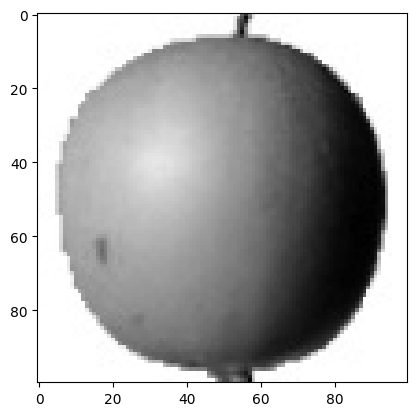

In [60]:
plt.imshow(fruits[0], cmap='gray_r')

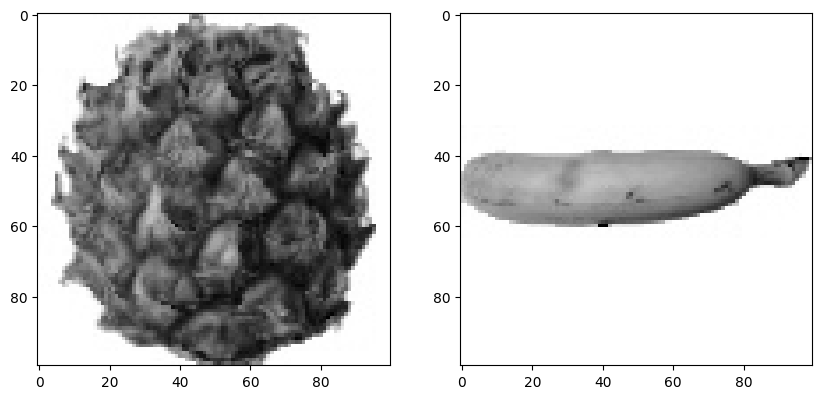

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(fruits[100], cmap='gray_r')
axes[1].imshow(fruits[200], cmap='gray_r')

In [63]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [64]:
print(apple.shape)

(100, 10000)


In [65]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


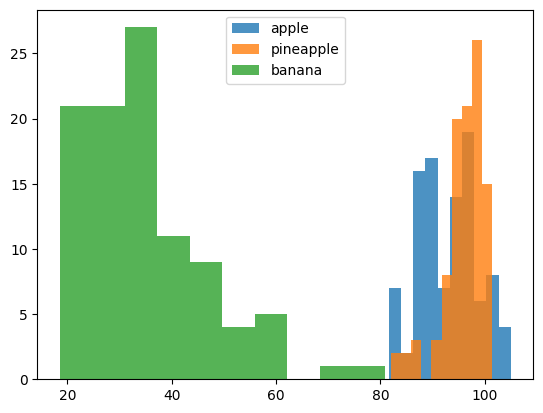

In [67]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])

<BarContainer object of 10000 artists>

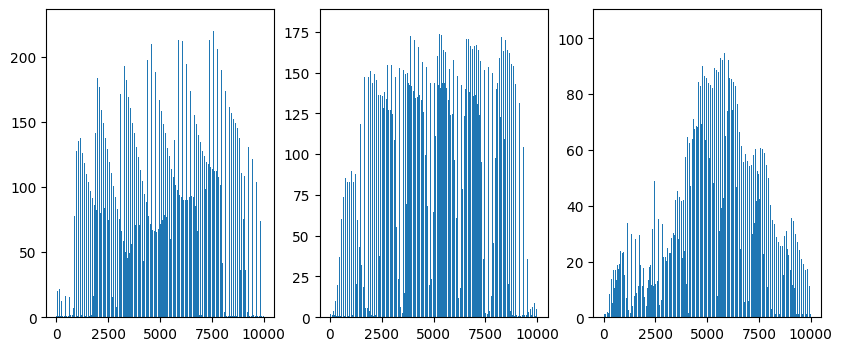

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].bar(range(10000), np.mean(apple, axis=0))
axes[1].bar(range(10000), np.mean(pineapple, axis=0))
axes[2].bar(range(10000), np.mean(banana, axis=0))

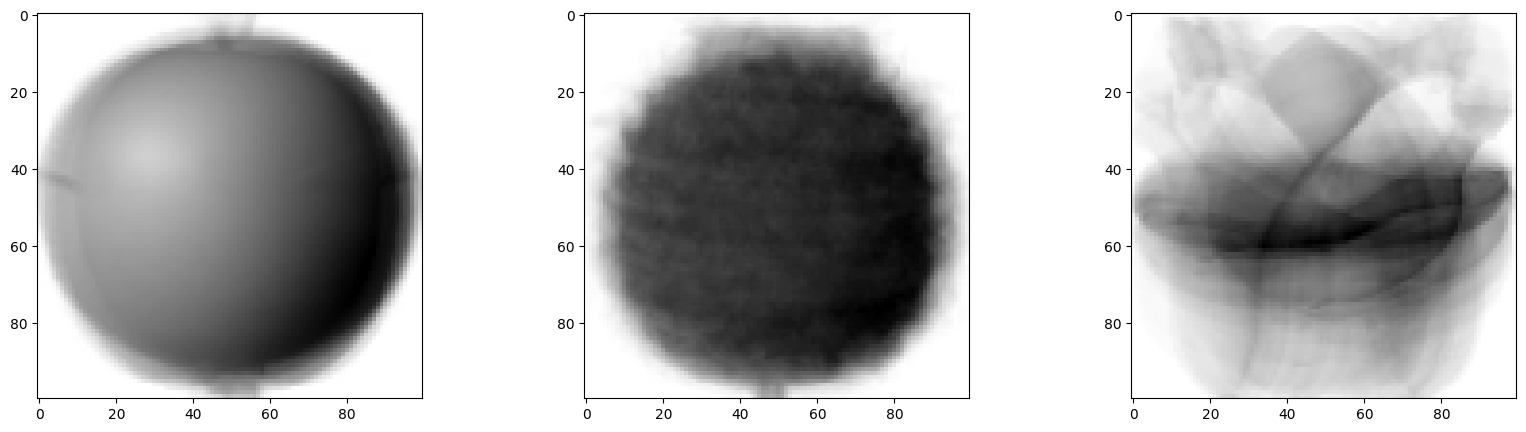

In [73]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].imshow(apple_mean, cmap='gray_r')
axes[1].imshow(pineapple_mean, cmap='gray_r')
axes[2].imshow(banana_mean, cmap='gray_r')

In [74]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
print(abs_mean.shape)

(300,)


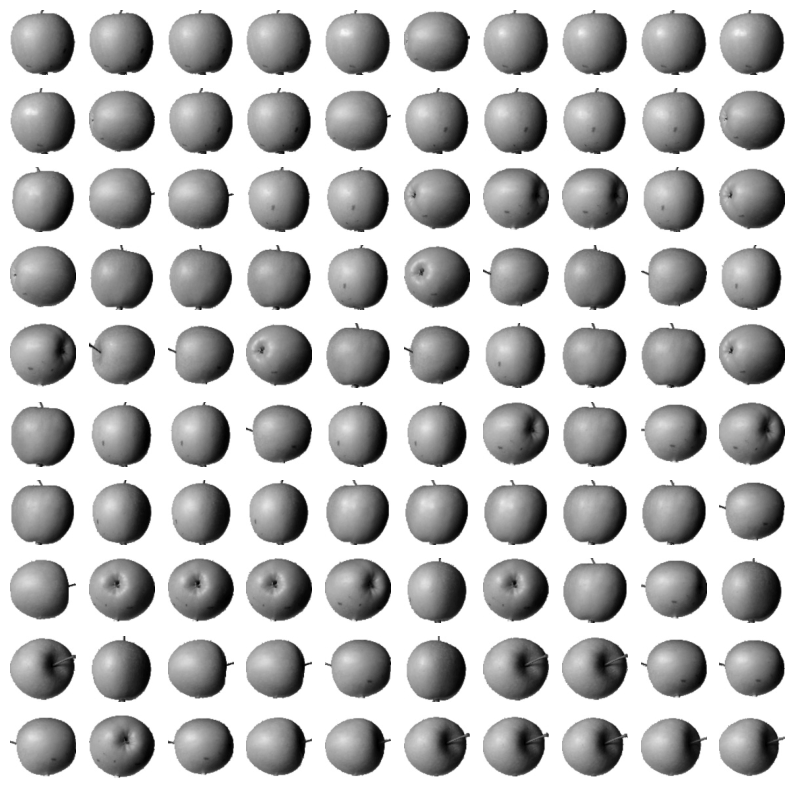

In [75]:
apple_index = np.argsort(abs_mean)[:100]
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axes[i, j].imshow(fruits[apple_index[i * 10 + j]], cmap='gray_r')
        axes[i, j].axis('off')


In [77]:
fruits_2d = fruits.reshape(-1, 100 * 100)

In [79]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

c:\Users\minja\anaconda3\envs\ml_cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [80]:
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [81]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([ 91,  98, 111], dtype=int64))


In [82]:
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axes = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axes[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axes[i, j].axis('off')

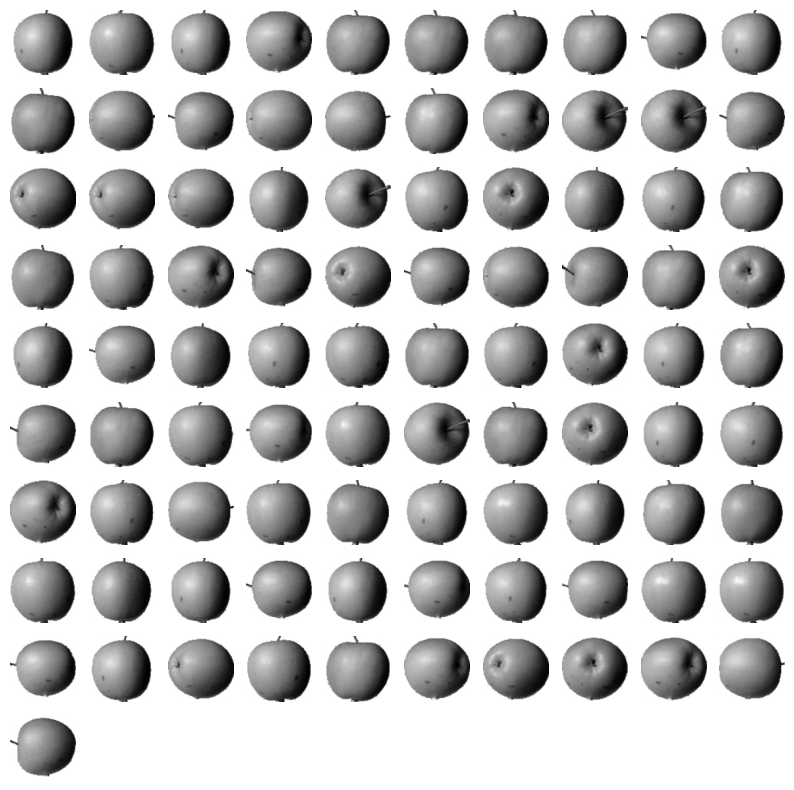

In [83]:
draw_fruits(fruits[km.labels_ == 0])

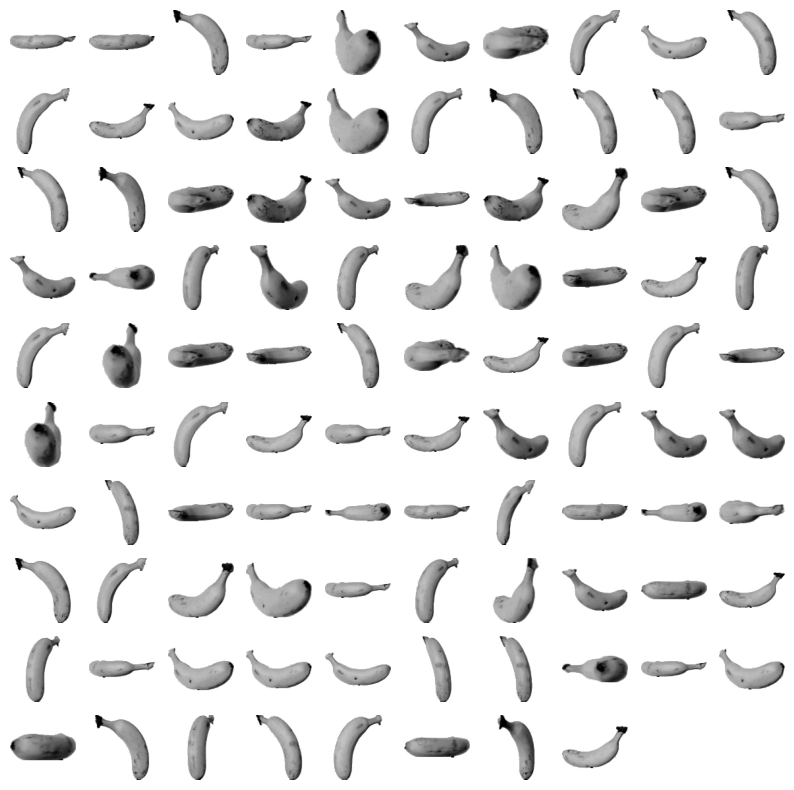

In [84]:
draw_fruits(fruits[km.labels_ == 1])

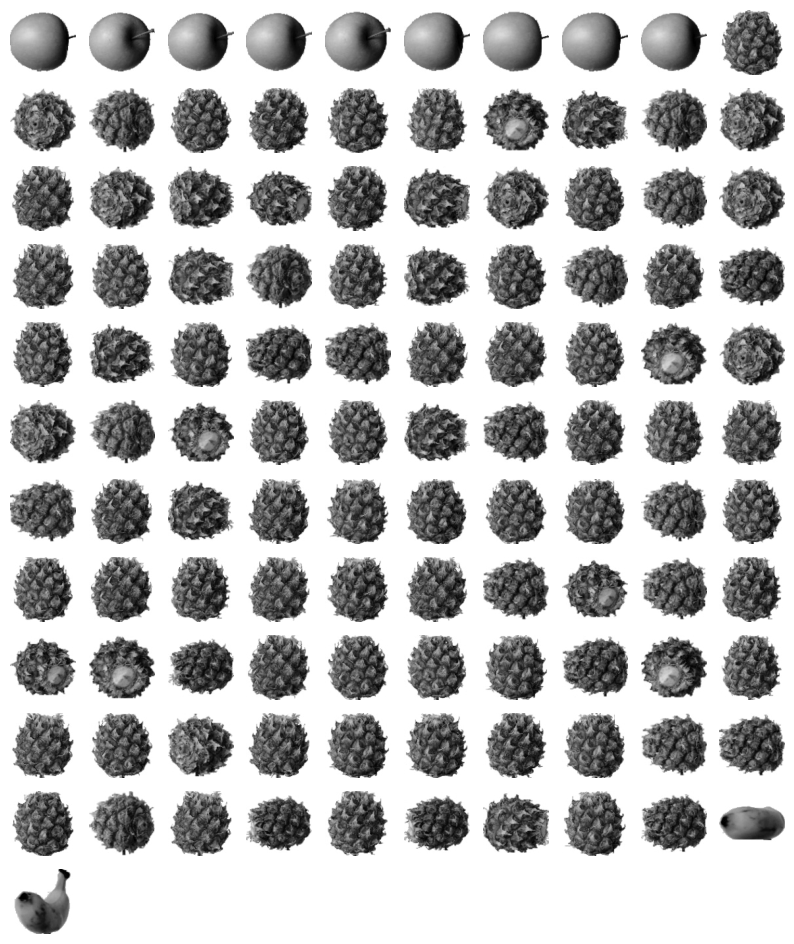

In [85]:
draw_fruits(fruits[km.labels_ == 2])

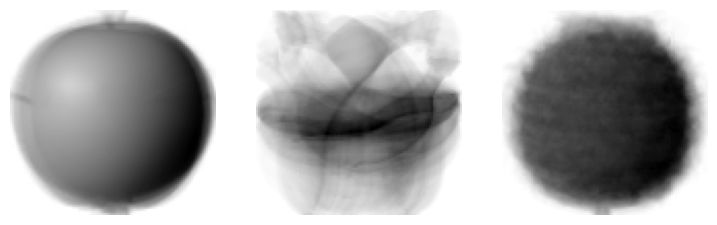

In [86]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [87]:
print(km.transform(fruits_2d[100:101]))

[[5267.70439881 8837.37750892 3393.8136117 ]]


In [88]:
print(km.predict(fruits_2d[100:101]))

[2]


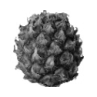

In [89]:
draw_fruits(fruits[100:101])

In [90]:
print(km.n_iter_)

4


c:\Users\minja\anaconda3\envs\ml_cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\minja\anaconda3\envs\ml_cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\minja\anaconda3\envs\ml_cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\minja\anaconda3\envs\ml_cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

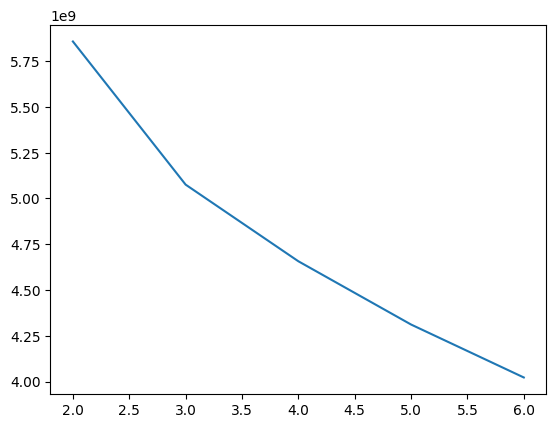

In [91]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [97]:
print(pca.components_.shape)

(50, 10000)


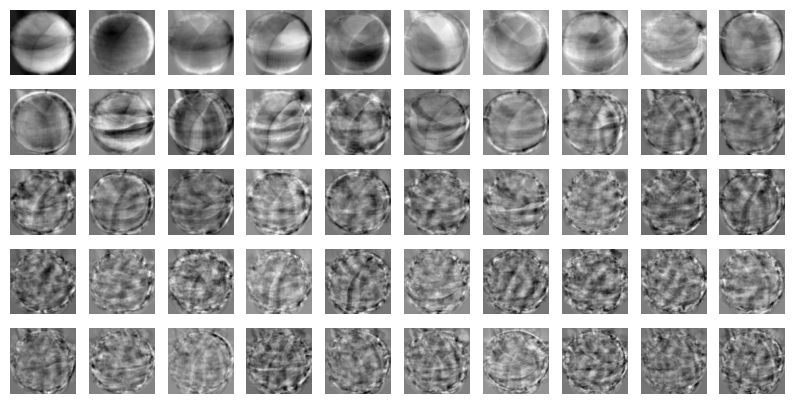

In [98]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [99]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [100]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


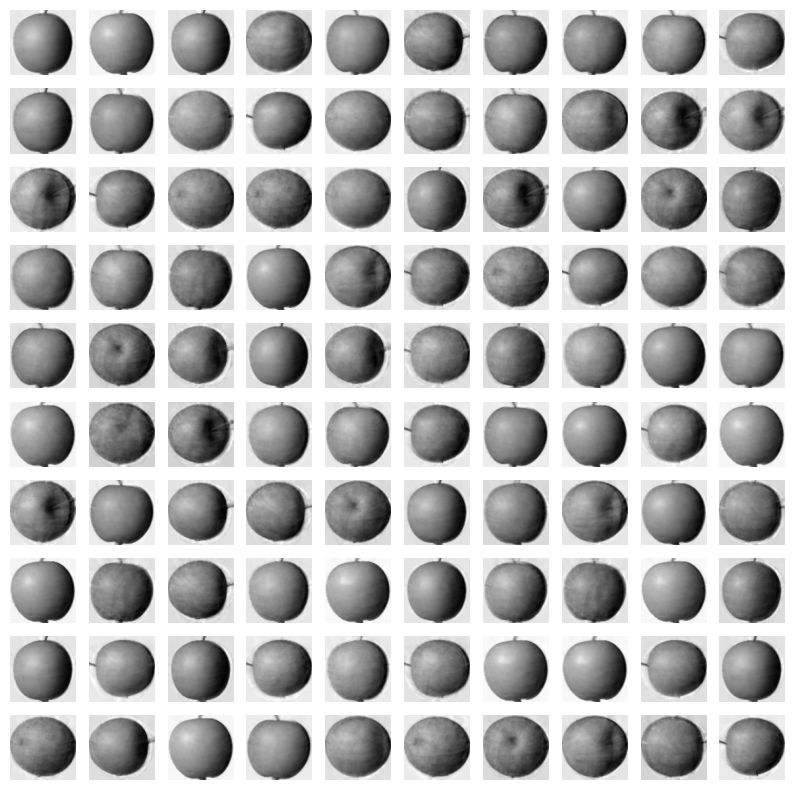

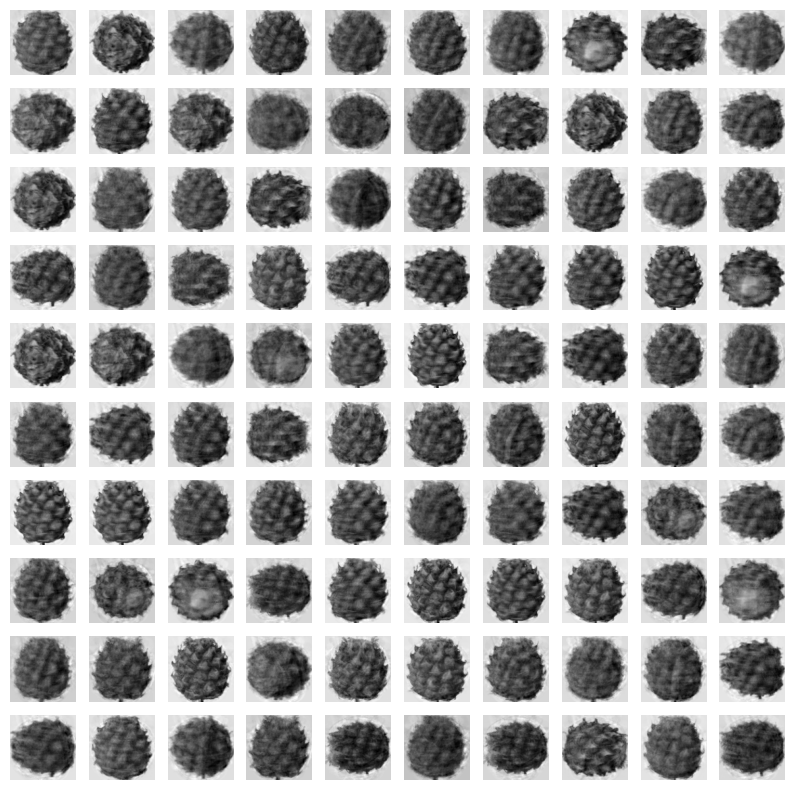

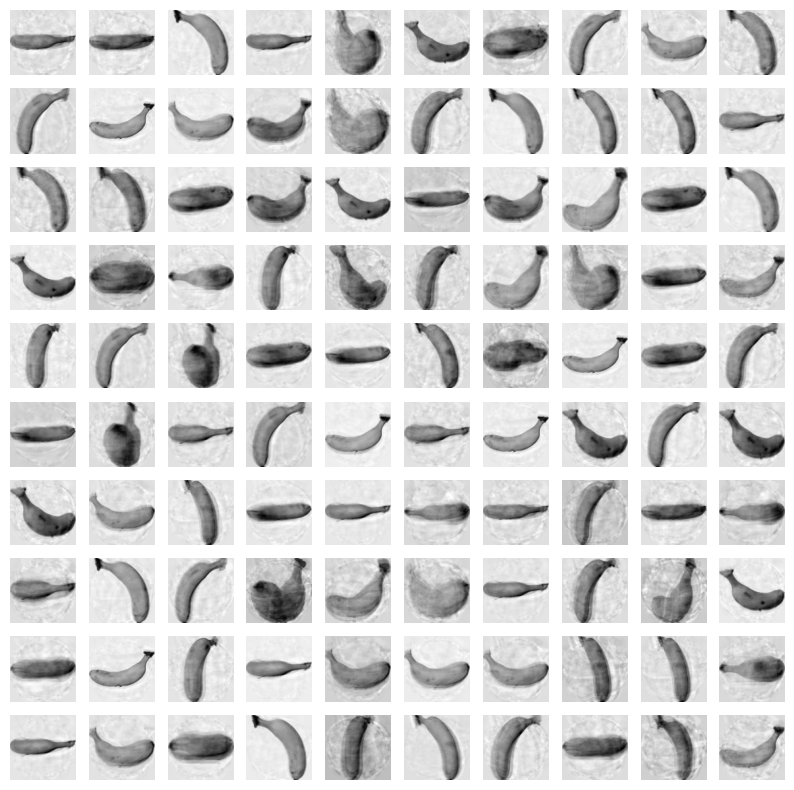

In [101]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

In [102]:
print(np.sum(pca.explained_variance_ratio_))

0.9215588181055602


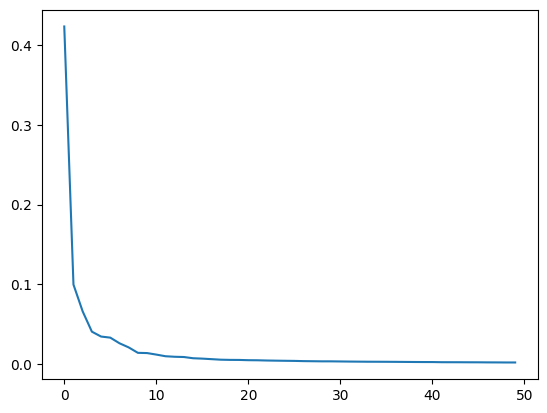

In [103]:
plt.plot(pca.explained_variance_ratio_)

In [104]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [105]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [106]:
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.7517764568328857


In [107]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.01148209571838379


In [108]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [109]:
print(pca.n_components_)

2


In [110]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [112]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.023324012756347656


c:\Users\minja\anaconda3\envs\ml_cuda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\minja\anaconda3\envs\ml_cuda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [113]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


c:\Users\minja\anaconda3\envs\ml_cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


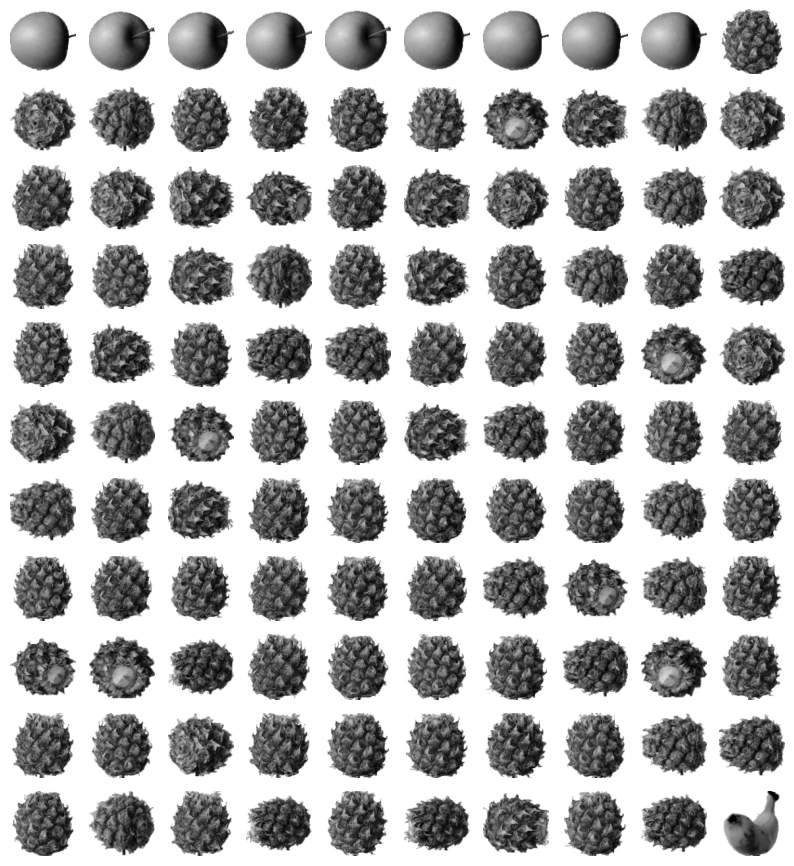

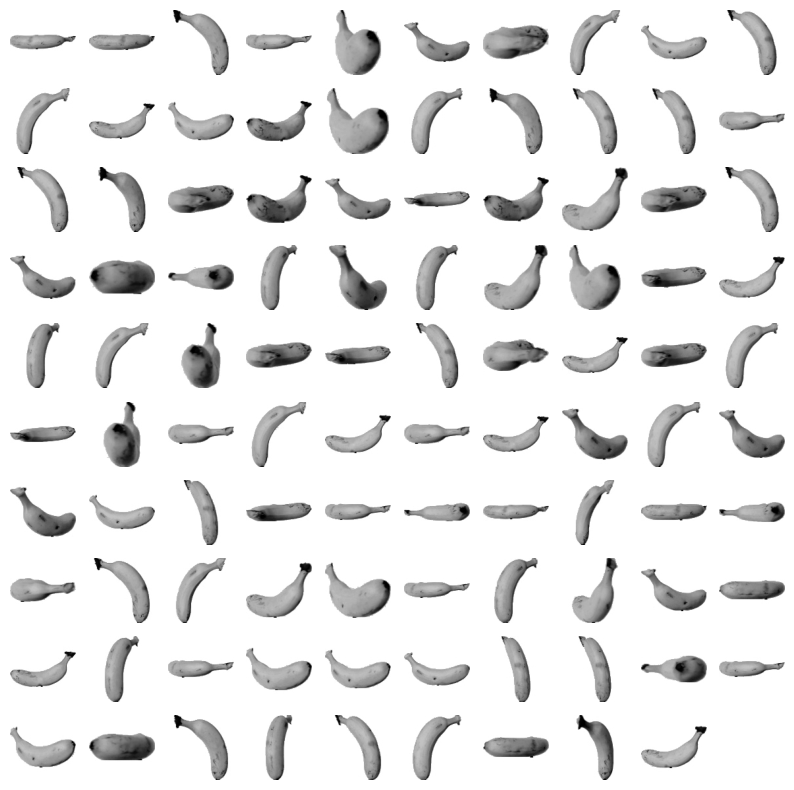

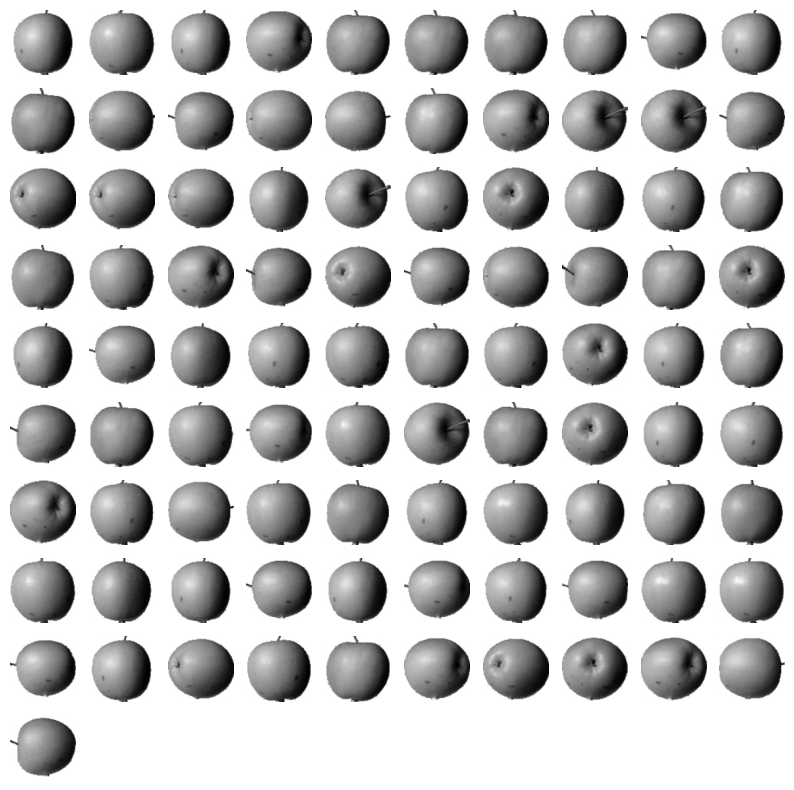

In [114]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

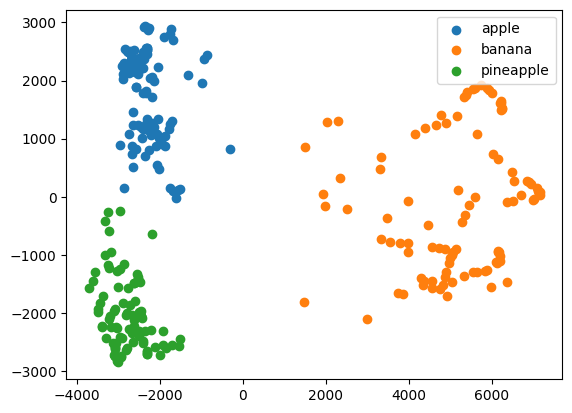

In [116]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])